In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

# ECG
---
- An electrocardiogram (ECG) is a simple, non-invasive test that records the electrical activity of the heart.<br>
- An ECG can help diagnose certain heart conditions, including abnormal heart rhythms and coronary heart disease (heart attack and angina).<br>
- A doctor may recommend an ECG if you are experiencing symptoms like chest pain, breathlessness, dizziness, fainting or a feeling of your heart racing, fluttering, thumping or pounding in your chest (palpitations).<br>
- An ECG can also help monitor how treatments for a heart condition, like medicines or implantable cardiac devices, are working.<br>

# Diseases that are diagnosed with ECG
---
- Abnormal heart rhythms (arrhythmia).
- Heart inflammation (pericarditis or myocarditis).
- Ennlargement of the heart walls or viens (Cardiomyopathy).

# Step 1: Read the dataset
---
### About the Dataset
---
https://www.timeseriesclassification.com/description.php?Dataset=ECG5000

- The original dataset for "ECG5000" is a 20-hour long ECG downloaded from Physionet. The name is BIDMC Congestive Heart Failure Database(chfdb) and it is record "chf07". It was originally published in "Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23)". The data was pre-processed in two steps: (1) extract each heartbeat, (2) make each heartbeat equal length using interpolation. This dataset was originally used in paper "A general framework for never-ending learning from time series streams", DAMI 29(6). After that, 5,000 heartbeats were randomly selected. The patient has severe congestive heart failure and the class values were obtained by automated annotation


In [137]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [138]:
dataframe.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
4988,-1.288596,-2.278724,-2.794928,-3.494184,-3.528543,-3.330146,-2.830235,-2.168832,-1.475435,-1.140340,...,1.851129,1.932385,2.245510,2.550319,2.221183,1.504106,1.142408,0.983572,1.120016,0.0
4989,-1.011168,-1.623403,-1.833340,-2.651300,-2.699728,-2.530072,-2.373822,-2.012117,-1.524117,-0.890103,...,-2.806776,-3.214221,-3.518329,-3.293595,-2.642195,-1.537684,-0.520506,-0.336234,0.513490,0.0
4990,-0.392358,-1.174090,-1.689053,-2.406077,-2.630179,-2.579774,-2.356171,-1.931773,-1.252256,-0.646230,...,-2.424399,-2.862044,-3.224369,-3.796142,-3.750093,-3.218652,-2.014173,-1.367494,-0.595857,0.0
4991,-0.097026,-1.188811,-2.059970,-2.987246,-3.459390,-3.472208,-3.263205,-2.761881,-1.959433,-1.308527,...,1.877755,2.422262,2.536718,1.847567,1.398425,1.197775,1.309180,0.848214,0.418162,0.0
4992,-0.495351,-1.270163,-1.986271,-2.736936,-2.858549,-2.742976,-2.240365,-1.569523,-0.843160,-0.538130,...,-2.337237,-2.743785,-3.465983,-4.019493,-3.544676,-2.625789,-1.511289,-0.983429,-0.289070,0.0
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0
4997,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,-0.733839,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,0.0


# Separate the target variable from the features.
---
- Normal rhythms, which are labeled in this dataset as 1. 
- Abnornmal heart rhythms are labeled as 0.

In [139]:
# The last element contains the labels
labels = raw_data[:, -1]

In [140]:
# Separate the normal rhythms from the abnormal rhythms.
# Train the autoencoder using only the normal rhythms.
# Test the autoencoder using only the abnormal rhythms
labels

array([1., 1., 1., ..., 0., 0., 0.])

# Separate the data to test and train
---

In [141]:
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

In [142]:
#data2 is for log transform since it cannot accept any negative value

In [143]:
data2 = data+6

In [144]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

# Normalize the dataset
---
<font color=red><b>QUESTION</b></font>
- When to use normalization as oppose to standardization?

In [145]:
# Data normalization
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [146]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [147]:
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]

In [148]:
#Non Boolean Labeling

In [149]:
#train_labels = train_labels.astype(int)
#test_labels = test_labels.astype(int)

In [150]:
#normal_train_data = train_data[train_labels == 0]
#normal_test_data = test_data[test_labels == 0]

#anomalous_train_data = train_data[train_labels == 1]
#anomalous_test_data = test_data[test_labels == 1]

In [151]:
#End of Section

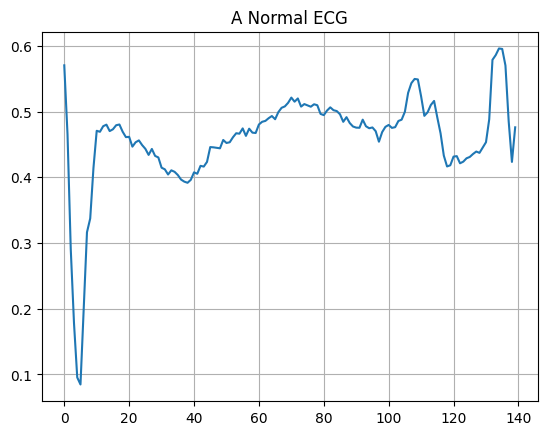

In [152]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

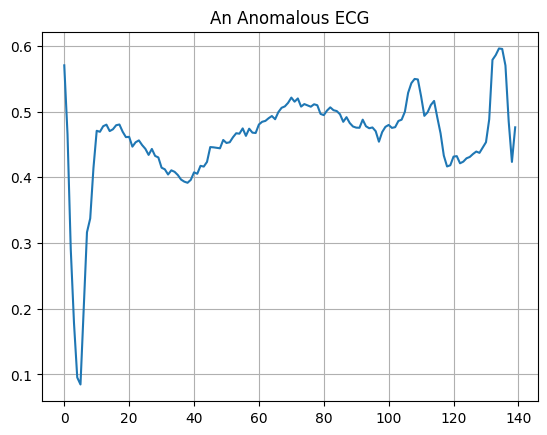

In [153]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

# Create the architecture of the autoencoder
---
- What are the parts and the purpose of each part of an autoencoder?

In [154]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [155]:
autoencoder.compile(optimizer='adam', loss='mae')

# Train your autoencoder architecture
---

In [156]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 4s 126ms/step - loss: 0.0588 - val_loss: 0.0536
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0563 - val_loss: 0.0521
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0541 - val_loss: 0.0507
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0512 - val_loss: 0.0488
Epoch 5/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0477 - val_loss: 0.0472
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0440 - val_loss: 0.0451
Epoch 7/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0404 - val_loss: 0.0431
Epoch 8/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0370 - val_loss: 0.0413
Epoch 9/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0339 - val_loss: 0.0397
Epoch 10/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0313 - val_loss: 0.0382
Epoch 11/20
5/5 [===========

# Plot the errors
---

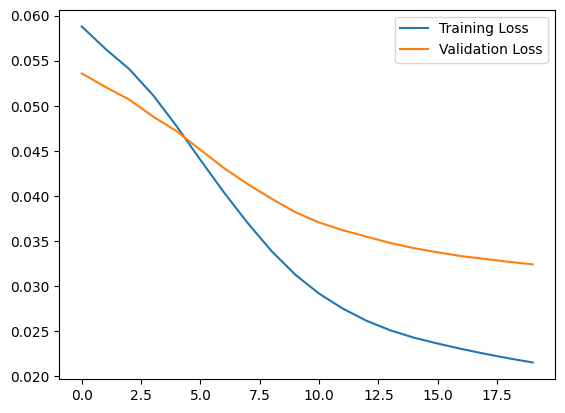

In [157]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

# Question
---
- In reality trainnig loss should always be lower than validation loss, why?
- What happens if validation loss is lower than the training loss?

# Performance Testing from Training Data
---
- We can use our trained autoencoders to reconstruct the ECG signals.
- Ideally out reconstructed signals shold look exactly the same as the training signal but in reality it is not due to some variation in the data.
- We then create a "reconstruction error" This is an area that determines how close or how far the reconstructed data is to the  datatraining.
- For medical settings the reconstruction error should be lower than 1 standard deviation of the training data.

#### Detecting anomalies
---
- Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. 
- Determine the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.
- Choose a threshold value that is one standard deviations above the mean.

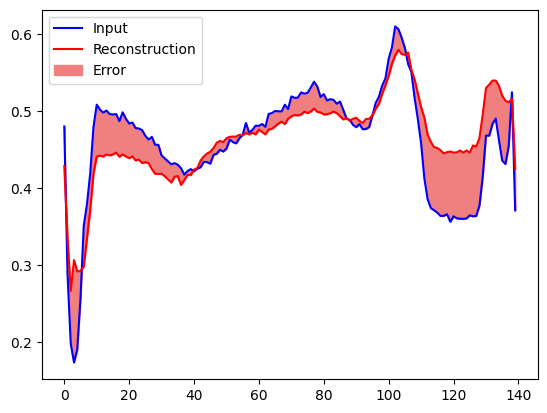

In [158]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 3ms/step


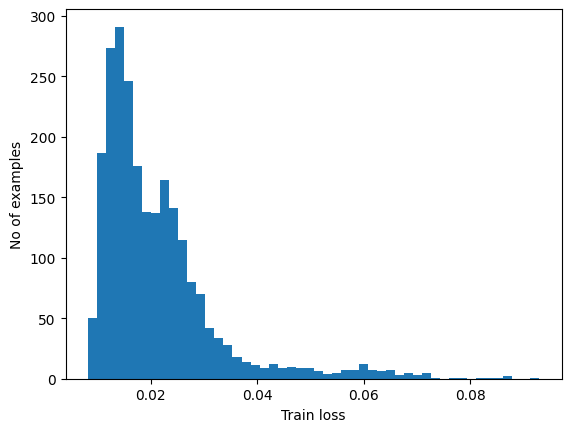

In [159]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [160]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.032568343


# Generating Recommendations for Diagnosis (THIS IS <font color=red>NOT A DIAGNOSIS!</font>)
---
- Once the construction error is confirmed to be lower than 1 standard deviation form the training set, we can use the same concept towards the testing dataset.
- Plot the testing dataset, and reconstruct the signal from the decoded layer of the autoencoders, and generate a reconstruction error.

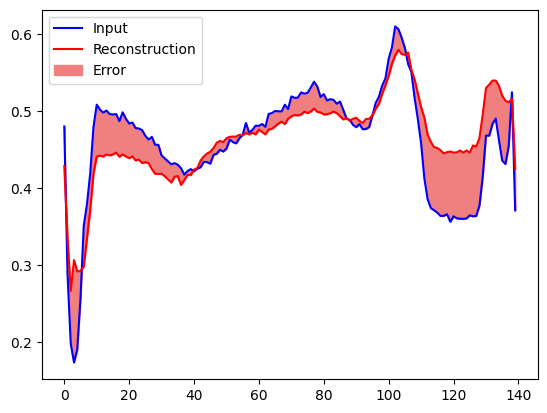

In [161]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the precision and recall of your classifier.

18/18 [==============================] - 0s 4ms/step


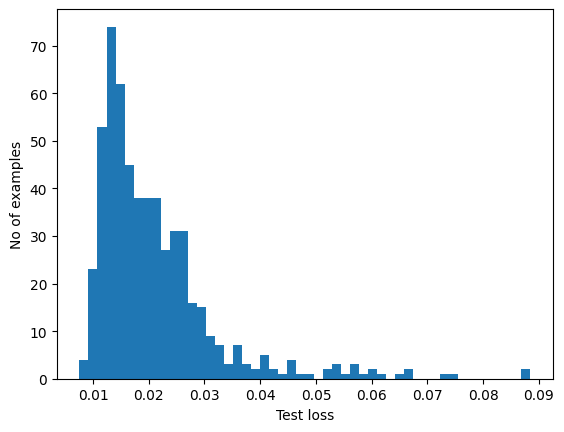

In [162]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [163]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [164]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9941060903732809
Recall = 0.9035714285714286


# Coding Experiments
- Holding the autoencoder architecture constant. What would happen to the performance if you chosed other data transformation? Experiment using standardization, and log transformation, minmax scaler.
- Holding the autoencoder architecture constant. What would happen to the performance if the label data were not transformed into boolean?
- Holding the autoencoder architecture constant. What would the behavior of the error reconstruction if a different optimizer was used? (choose only one optimizer from https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- Holding the autoencoder architecture constant. Try using binary cross entropy as a loss function and compare its reconstruction error to the original loss function.
- Try experimenting with the autoencoder architecture and record the result, for which new architecture has the lowest reconstruction error? Try playing around with:
    - Different activation functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations
    - Different loss functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations
    - Try adding some dropout during training the model: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
    - Increasing or decreasing the units per layer.
    - Increasing or decreaing the number of layers.

In [24]:
1.

1.0

In [25]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
standard_scaler = StandardScaler()
log_transformer = FunctionTransformer()

In [26]:
scaled_data = min_max_scaler.fit_transform(data)
print(scaled_data)

[[0.56575121 0.40332497 0.17432985 ... 0.61919495 0.6603536  0.46577817]
 [0.48124682 0.29266943 0.1086373  ... 0.69085876 0.67920847 0.3450321 ]
 [0.52688582 0.42543966 0.16145521 ... 0.64097497 0.65831035 0.42020836]
 ...
 [0.479358   0.45765568 0.29062168 ... 0.28890479 0.3757224  0.31745875]
 [0.5285431  0.49203388 0.29419531 ... 0.74457616 0.68219946 0.51111535]
 [0.45979477 0.46181072 0.33520026 ... 0.35657152 0.41749517 0.40073838]]


In [27]:
standardized_data = standard_scaler.fit_transform(data)
print(standardized_data)

[[ 0.13015314 -0.81456844 -0.92422829 ...  0.41209124  0.77172417
   0.63616554]
 [-0.72754575 -1.62378238 -1.29351275 ...  0.76190873  0.87786548
  -0.51593741]
 [-0.26432105 -0.65284576 -0.99660187 ...  0.51840757  0.76022193
   0.2013596 ]
 ...
 [-0.74671683 -0.4172529  -0.27050469 ... -1.20017695 -0.83057384
  -0.77902953]
 [-0.24750005 -0.16584826 -0.25041586 ...  1.0241232   0.89470289
   1.06875185]
 [-0.9452788  -0.38686749 -0.01991038 ... -0.86987066 -0.59541889
   0.01558609]]


In [28]:
transformed_data = log_transformer.fit_transform(data2) 
print(transformed_data)

[[5.88747817 3.1727962  2.2261031  ... 6.12343082 6.92528624 6.19313742]
 [4.8991222  2.0031602  1.7141574  ... 6.77381971 7.1196209  4.5637501 ]
 [5.43291198 3.4065498  2.1257703  ... 6.32109663 6.90422673 5.57820341]
 ...
 [4.8770307  3.7470752  3.1323719  ... 3.125864   3.9916306  4.1916662 ]
 [5.45229539 4.1104549  3.1602214  ... 7.261335   7.1504486  6.80493225]
 [4.6482209  3.7909942  3.4797753  ... 3.7399772  4.422177   5.31546908]]


In [29]:
train1_data, test1_data, train1_labels, test1_labels = train_test_split(
    scaled_data, labels, test_size=0.2, random_state=21
)

train2_data, test2_data, train2_labels, test2_labels = train_test_split(
    standardized_data, labels, test_size=0.2, random_state=21
)

train3_data, test3_data, train3_labels, test3_labels = train_test_split(
    transformed_data, labels, test_size=0.2, random_state=21
)

In [30]:
train1_labels = train1_labels.astype(bool)
test1_labels = test1_labels.astype(bool)

train2_labels = train2_labels.astype(bool)
test2_labels = test2_labels.astype(bool)

train3_labels = train3_labels.astype(bool)
test3_labels = test3_labels.astype(bool)

normal_train1_data = train1_data[train1_labels]
normal_test1_data = test1_data[test1_labels]

normal_train2_data = train2_data[train2_labels]
normal_test2_data = test2_data[test2_labels]

normal_train3_data = train3_data[train3_labels]
normal_test3_data = test3_data[test3_labels]

anomalous_train1_data = train1_data[train1_labels]
anomalous_test1_data = test1_data[test1_labels]

anomalous_train2_data = train2_data[train2_labels]
anomalous_test2_data = test2_data[test2_labels]

anomalous_train3_data = train3_data[train3_labels]
anomalous_test3_data = test3_data[test3_labels]

In [31]:
history1 = autoencoder.fit(normal_train1_data, normal_train1_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test1_data, test1_data),
          shuffle=True)

history2 = autoencoder.fit(normal_train2_data, normal_train2_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test2_data, test2_data),
          shuffle=True)

history3 = autoencoder.fit(normal_train3_data, normal_train3_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test3_data, test3_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 0s 61ms/step - loss: 0.1568 - val_loss: 0.1542
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1369 - val_loss: 0.1390
Epoch 3/20
5/5 [==============================] - 0s 24ms/step - loss: 0.1211 - val_loss: 0.1228
Epoch 4/20
5/5 [==============================] - 0s 37ms/step - loss: 0.1034 - val_loss: 0.1069
Epoch 5/20
5/5 [==============================] - 0s 42ms/step - loss: 0.0865 - val_loss: 0.0934
Epoch 6/20
5/5 [==============================] - 0s 90ms/step - loss: 0.0706 - val_loss: 0.0836
Epoch 7/20
5/5 [==============================] - 0s 67ms/step - loss: 0.0597 - val_loss: 0.0802
Epoch 8/20
5/5 [==============================] - 0s 44ms/step - loss: 0.0537 - val_loss: 0.0787
Epoch 9/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0499 - val_loss: 0.0765
Epoch 10/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0474 - val_loss: 0.0754
Epoch 11/20
5/5 [============

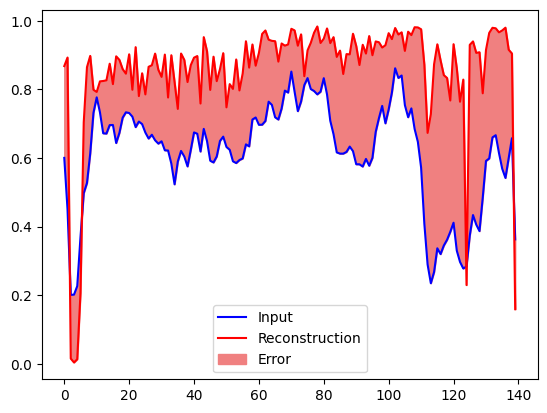

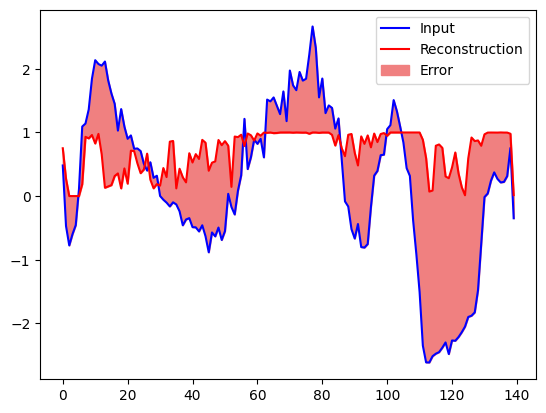

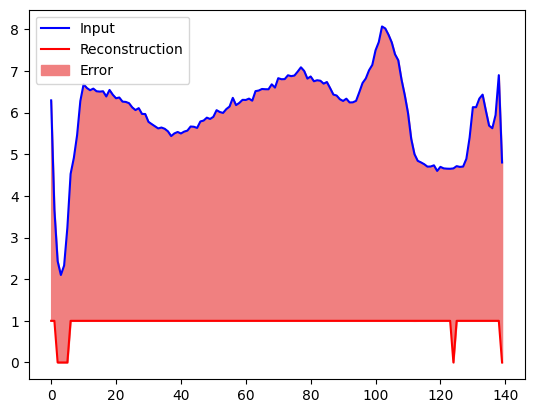

In [32]:
encoded_data1 = autoencoder.encoder(normal_test1_data).numpy()
decoded_data1 = autoencoder.decoder(encoded_data1).numpy()

plt.plot(normal_test1_data[0], 'b')
plt.plot(decoded_data1[0], 'r')
plt.fill_between(np.arange(140), decoded_data1[0], normal_test1_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

encoded_data2 = autoencoder.encoder(normal_test2_data).numpy()
decoded_data2 = autoencoder.decoder(encoded_data2).numpy()

plt.plot(normal_test2_data[0], 'b')
plt.plot(decoded_data2[0], 'r')
plt.fill_between(np.arange(140), decoded_data2[0], normal_test2_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

encoded_data3 = autoencoder.encoder(normal_test3_data).numpy()
decoded_data3 = autoencoder.decoder(encoded_data3).numpy()

plt.plot(normal_test3_data[0], 'b')
plt.plot(decoded_data3[0], 'r')
plt.fill_between(np.arange(140), decoded_data3[0], normal_test3_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [33]:
encoded_data1 = autoencoder.encoder(anomalous_test1_data).numpy()
decoded_data1 = autoencoder.decoder(encoded_data1).numpy()

encoded_data2 = autoencoder.encoder(anomalous_test2_data).numpy()
decoded_data2 = autoencoder.decoder(encoded_data2).numpy()

encoded_data3 = autoencoder.encoder(anomalous_test3_data).numpy()
decoded_data3 = autoencoder.decoder(encoded_data3).numpy()

In [34]:
reconstructions1 = autoencoder.predict(normal_train1_data)
train_loss1 = tf.keras.losses.mae(reconstructions1, normal_train1_data)

reconstructions2 = autoencoder.predict(normal_train2_data)
train_loss2 = tf.keras.losses.mae(reconstructions2, normal_train2_data)

reconstructions3 = autoencoder.predict(normal_train3_data)
train_loss3 = tf.keras.losses.mae(reconstructions3, normal_train3_data)

threshold1 = np.mean(train_loss1) + np.std(train_loss1)

threshold2 = np.mean(train_loss2) + np.std(train_loss2)

threshold3 = np.mean(train_loss3) + np.std(train_loss3)

74/74 [==============================] - 0s 3ms/step


In [35]:
preds1 = predict(autoencoder, test1_data, threshold1)
print_stats(preds1, test1_labels)

preds2 = predict(autoencoder, test2_data, threshold2)
print_stats(preds2, test2_labels)

preds3 = predict(autoencoder, test3_data, threshold3)
print_stats(preds3, test3_labels)

Accuracy = 0.791
Precision = 0.7562043795620438
Recall = 0.925
Accuracy = 0.659
Precision = 0.6367041198501873
Recall = 0.9107142857142857
Accuracy = 0.572
Precision = 0.5670731707317073
Recall = 0.9964285714285714


In [ ]:
2 Using Astype (int)

In [24]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.134
Precision = 0.12682926829268293
Recall = 0.09285714285714286


In [ ]:
The performance if not boolean would be worse

In [ ]:
3 Using Adadelta

In [20]:
autoencoder.compile(optimizer='adadelta', loss='mae')

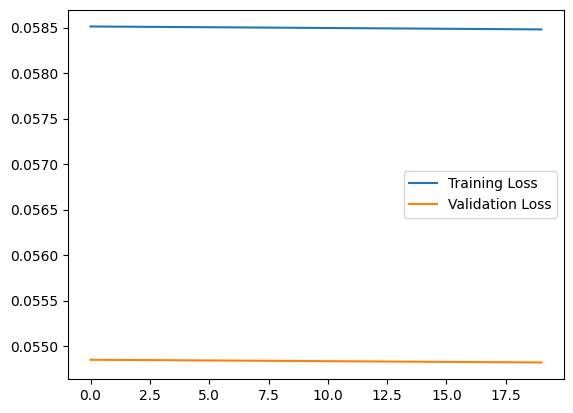

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

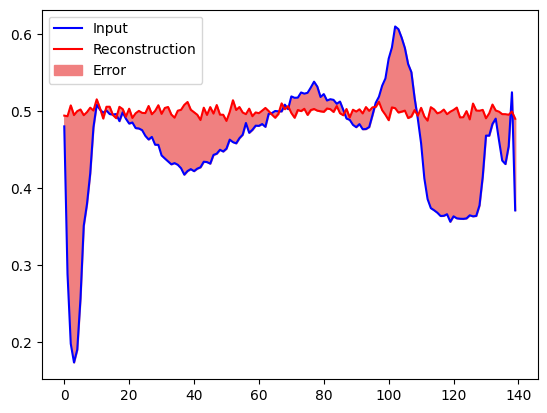

In [19]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
4. 

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

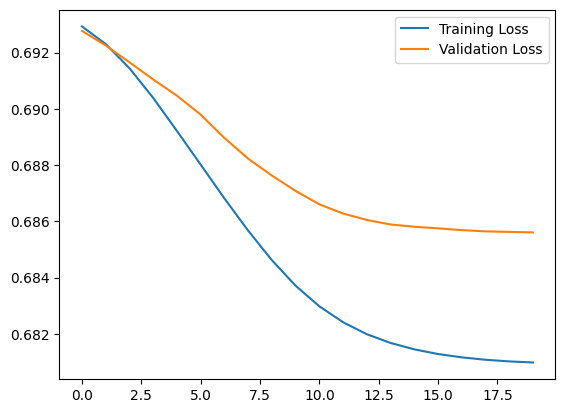

In [15]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

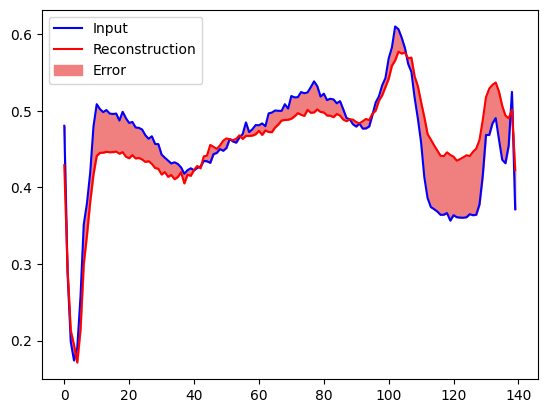

In [16]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
5

In [ ]:
Different activation /using mae/

In [13]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="tanh"),
      layers.Dense(8, activation="relu")
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="swish"),
      layers.Dense(32, activation="tanh"),
      layers.Dense(140, activation="sigmoid")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [21]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571


In [ ]:
Different loss functions

In [69]:
autoencoder.compile(optimizer='adam', loss='kld')

In [70]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.kld(reconstructions, normal_train_data)

74/74 [==============================] - 1s 4ms/step


In [72]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.kld(reconstructions, anomalous_test_data)

18/18 [==============================] - 0s 4ms/step


In [73]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.kld(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [74]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.576
Precision = 0.5718816067653277
Recall = 0.9660714285714286


In [75]:
autoencoder.compile(optimizer='adam', loss='mse')

In [76]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mse(reconstructions, normal_train_data)

74/74 [==============================] - 1s 4ms/step


In [78]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mse(reconstructions, anomalous_test_data)

18/18 [==============================] - 0s 4ms/step


In [79]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [80]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.495
Precision = 0.529923830250272
Recall = 0.8696428571428572


In [ ]:
Adding Dropout /using mae/

In [48]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Dense(32, activation="relu"),
        Dropout(rate=0.2),  # Add dropout with 20% probability after the first layer
        layers.Dense(16, activation="relu"),
        Dropout(rate=0.3),  # Add dropout with 30% probability after the second layer
        layers.Dense(8, activation="relu")
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(16, activation="relu"),
        Dropout(rate=0.1),  # Add dropout with 10% probability after the first layer
        layers.Dense(32, activation="relu"),
        Dropout(rate=0.2),  # Add dropout with 20% probability after the second layer
        layers.Dense(140, activation="sigmoid")
    ])
      
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [55]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.946
Precision = 0.994140625
Recall = 0.9089285714285714


In [ ]:
Increase unit /using mae/

In [83]:
class AnomalyDetector(Model):
    def __init__(self, units_multiplier=2):
        super(AnomalyDetector, self).__init__()
        self.units_multiplier = units_multiplier
        self.encoder = tf.keras.Sequential([
            layers.Dense(32 * self.units_multiplier, activation="relu"),
            layers.Dense(16 * self.units_multiplier, activation="relu"),
            layers.Dense(8 * self.units_multiplier, activation="relu")
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(16 * self.units_multiplier, activation="relu"),
            layers.Dense(32 * self.units_multiplier, activation="relu"),
            layers.Dense(140, activation="sigmoid")
        ])
      
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [90]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.941
Precision = 0.9940828402366864
Recall = 0.9


In [ ]:
Decrease Layer /using mae/

In [92]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Dense(16, activation="relu"),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(8, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(140, activation="sigmoid") 
    ])
      
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [99]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.945
Precision = 0.9922027290448343
Recall = 0.9089285714285714
